<a href="https://colab.research.google.com/github/sandra606/StockPrediction/blob/main/NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/Microsoft_Stock.csv")
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0276
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0897e-04
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.6844e-04
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7064e-04
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.8425e-04
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3001e-04
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1278e-04
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8045e-04
Epoch 9/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9406e-04
Epoch 10/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9090e-04
Epoch 11/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1250e-04
Epoch 12/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3808e-04
Epoch 13/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2122e-04
Epoch 14/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9878e-04
Epoch 15/20
76/76 ━━━━━━━━━━━━━━━

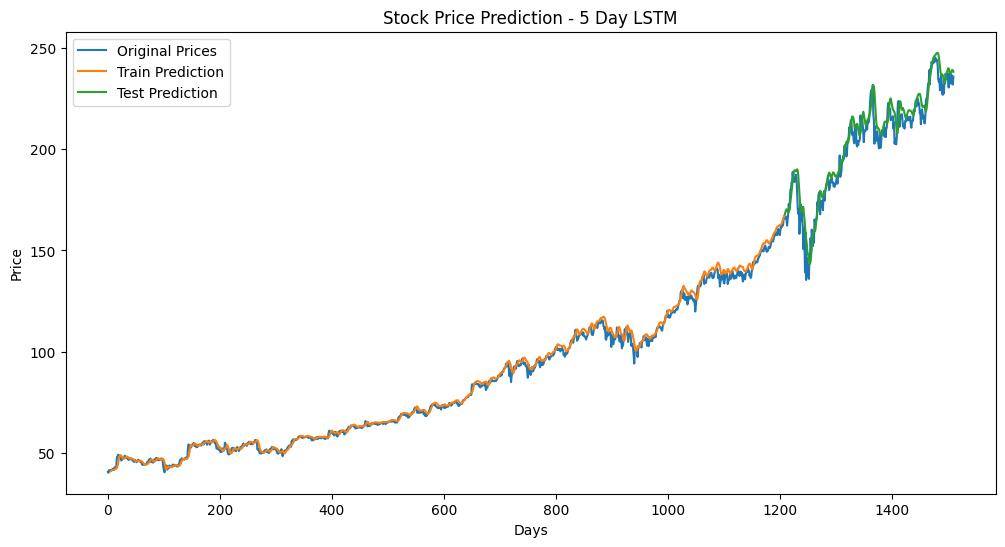

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import r2_score
import math


df = pd.read_csv("//content/Microsoft_Stock.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)


data = df[['Close']].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


def create_sequences(data, lookback=5):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 5
X, y = create_sequences(scaled_data, lookback)


X = np.reshape(X, (X.shape[0], X.shape[1], 1))


split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(lookback, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)


train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_inv = scaler.inverse_transform(train_pred)
test_pred_inv = scaler.inverse_transform(test_pred)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


train_rmse = math.sqrt(mean_squared_error(y_train_inv, train_pred_inv))
test_rmse = math.sqrt(mean_squared_error(y_test_inv, test_pred_inv))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

train_r2 = r2_score(y_train_inv, train_pred_inv)
test_r2 = r2_score(y_test_inv, test_pred_inv)

print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)



plt.figure(figsize=(12,6))
plt.plot(np.arange(len(data)), scaler.inverse_transform(scaled_data), label='Original Prices')
plt.plot(np.arange(lookback, lookback+len(train_pred_inv)), train_pred_inv, label='Train Prediction')
plt.plot(np.arange(lookback+len(train_pred_inv), lookback+len(train_pred_inv)+len(test_pred_inv)), test_pred_inv, label='Test Prediction')
plt.legend()
plt.title("Stock Price Prediction - 5 Day LSTM")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


In [3]:
import joblib
model.save("lstm_stock_model.h5")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [4]:
! pip install gradio
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load model and scaler
model = load_model("lstm_stock_model.h5")
scaler = joblib.load("scaler.pkl")

# Define prediction function
def predict_next_day_price(d1, d2, d3, d4, d5):
    try:
        prices = np.array([[d1], [d2], [d3], [d4], [d5]]).reshape(-1, 1)
        scaled_prices = scaler.transform(prices)
        input_seq = scaled_prices.reshape(1, 5, 1)
        predicted_scaled = model.predict(input_seq)
        predicted_price = scaler.inverse_transform(predicted_scaled)
        return float(predicted_price[0][0])
    except Exception as e:
        return f"Error: {e}"

# Gradio Interface
interface = gr.Interface(
    fn=predict_next_day_price,
    inputs=[
        gr.Number(label="Day 1 Close Price"),
        gr.Number(label="Day 2 Close Price"),
        gr.Number(label="Day 3 Close Price"),
        gr.Number(label="Day 4 Close Price"),
        gr.Number(label="Day 5 Close Price")
    ],
    outputs=gr.Number(label="Predicted Next Day Price"),
    title="Stock Price Predictor",
    description="Enter the last 5 days' closing prices to predict the next day's closing price."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b7932ea69aedd49761.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
